In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
class Store():
    def __init__(self,pos,size,text):
        self.pos=pos
        self.size=size
        self.text=text

def draw(img, storedVar):

    for button in storedVar:
        x, y = button.pos
        w, h = button.size
        cv2.rectangle(img, button.pos, (x + w, y + h), (64, 64, 64), thickness=2)
    return img

In [10]:
StoredVar = []

StoredVar.append(Store([100, 100],[250, 150],"2"))
StoredVar.append(Store([930, 100],[250, 150],"3"))
StoredVar.append(Store([480, 280],[320, 120],"4"))
StoredVar.append(Store([270, 360],[150, 250],"5"))
StoredVar.append(Store([560, 420],[160, 120],"6"))
StoredVar.append(Store([850, 360],[150, 250],"7"))
StoredVar.append(Store([480, 570],[320, 120],"8"))
StoredVar.append(Store([100, 710],[250, 150],"9"))
StoredVar.append(Store([930, 710],[250, 150],"10"))

In [11]:
img = np.full((960, 1280, 3), 255, np.uint8)
img = draw(img, StoredVar)
# thickness = 2

# cv2.rectangle(img, (100, 100), (300, 300), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (900, 100), (1100, 300), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (530, 530), (680, 680), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (100, 900), (300, 1100), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (900, 900), (1100, 1100), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (450, 350), (750, 500), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (450, 710), (750, 860), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (250, 450), (400, 750), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (810, 450), (960, 750), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(100*1280/1200), round(100*960/1200)), (round(300*1280/1200), round(300*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(900*1280/1200), round(100*960/1200)), (round(1100*1280/1200), round(300*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(530*1280/1200), round(530*960/1200)), (round(680*1280/1200), round(680*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(100*1280/1200), round(900*960/1200)), (round(300*1280/1200), round(1100*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(900*1280/1200), round(900*960/1200)), (round(1100*1280/1200), round(1100*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(450*1280/1200), round(350*960/1200)), (round(750*1280/1200), round(500*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(450*1280/1200), round(710*960/1200)), (round(750*1280/1200), round(860*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(250*1280/1200), round(450*960/1200)), (round(400*1280/1200), round(750*960/1200)), (255, 0, 0), thickness=thickness)
# cv2.rectangle(img, (round(810*1280/1200), round(450*960/1200)), (round(960*1280/1200), round(750*960/1200)), (255, 0, 0), thickness=thickness)

img2 = np.zeros_like(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(th)

In [12]:
colors = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [0, 255, 255], [255, 174, 0], [0,0,0], [159, 73, 252]] # red, green, blue, sky, orange, black, purple

In [13]:
colors = list()
for _ in range(cnt):
    colors.append([int(j) for j in np.random.randint(0, 255, 3)])

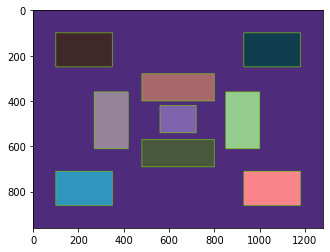

In [14]:
for i in range(cnt):
    img2[labels==i] = colors[i]
    # img2[labels==i] = colors[i]

plt.imshow(img2)

In [15]:
temp = img2.copy()

In [16]:
temp[150][140] = [0,0,0]#[[0,0,0] for _ in range(800)]

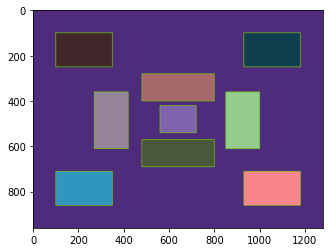

In [17]:
plt.imshow(temp)

In [18]:
data = pd.DataFrame(columns=['x','y','label'])

In [19]:
for _ in range(30000):
    x = np.random.randint(0, 1280)
    y = np.random.randint(0, 960)
    label = labels[y][x]
    temp = pd.DataFrame({'x':[x], 'y':[y], 'label':[label]})

    data = data.append(temp, ignore_index=True)

X_data = data.drop(columns=['label']).values
y_data = data['label'].values

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

X_train = tf.convert_to_tensor(X_train, dtype=tf.int32)
X_val = tf.convert_to_tensor(X_val, dtype=tf.int32)
# X_test = tf.convert_to_tensor(X_test, dtype=tf.int32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.int32)
# y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [20]:
model = Sequential([
    InputLayer(input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(11, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 11)                715       
Total params: 17,483
Trainable params: 17,483
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, mode='auto')

In [23]:
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=128, validation_batch_size=128, epochs=300, callbacks=[early_stopping])

Epoch 1/300
188/188 [==============================] - 0s 2ms/step - loss: 3.9856 - accuracy: 0.6526 - val_loss: 0.9774 - val_accuracy: 0.7443
Epoch 2/300
188/188 [==============================] - 0s 1ms/step - loss: 1.0696 - accuracy: 0.6704 - val_loss: 1.0559 - val_accuracy: 0.7443
Epoch 3/300
188/188 [==============================] - 0s 1ms/step - loss: 0.9397 - accuracy: 0.6852 - val_loss: 0.8243 - val_accuracy: 0.7078
Epoch 4/300
188/188 [==============================] - 0s 1ms/step - loss: 0.9534 - accuracy: 0.6844 - val_loss: 1.0219 - val_accuracy: 0.7432
Epoch 5/300
188/188 [==============================] - 0s 1ms/step - loss: 0.9100 - accuracy: 0.6948 - val_loss: 0.9201 - val_accuracy: 0.7100
Epoch 6/300
188/188 [==============================] - 0s 1ms/step - loss: 0.9530 - accuracy: 0.6832 - val_loss: 1.1850 - val_accuracy: 0.7438
Epoch 7/300
188/188 [==============================] - 0s 1ms/step - loss: 0.8852 - accuracy: 0.6952 - val_loss: 0.8013 - val_accuracy: 0.7420

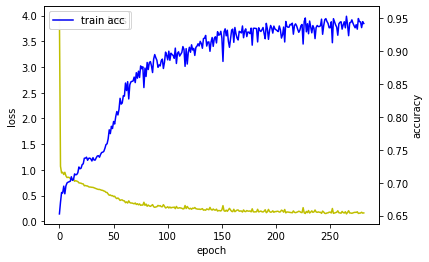

In [24]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
# loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
# acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [25]:
test_data = pd.DataFrame(columns=['x','y','label'])
for _ in range(10000):
    x = np.random.randint(0, 1280)
    y = np.random.randint(0, 960)
    label = labels[y][x]
    temp = pd.DataFrame({'x':[x], 'y':[y], 'label':[label]})

    test_data = test_data.append(temp, ignore_index=True)

In [26]:
X_test = test_data.drop(columns=['label']).values
y_test = test_data['label'].values
X_test = tf.convert_to_tensor(X_test, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

In [27]:
model.evaluate(X_test, y_test, batch_size=128)

79/79 [==============================] - 0s 3ms/step - loss: 0.1396 - accuracy: 0.9602


[0.1396290808916092, 0.9602000117301941]

In [28]:
model.save("keyboard")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: keyboard\assets
